This notebook is my first exploration of the RGI-mapped BN10 genomes to the CARD databases. I used all default settings with RGI, and grabbed only the hits which were deemed "strict" (i.e. 100% match). Let's see what's there!

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import seaborn as sns
%matplotlib inline

sns.set_style('white')

In [2]:
fname = '../../data/clean/bn10.rgi_mapped.strict.txt'

cols = ['ORF_ID', 'CONTIG', 'START', 'STOP', 'ORIENTATION',
        'CUT_OFF', 'PASS_EVALUE', 'Best_Hit_evalue',
        'Best_Hit_ARO', 'Best_Identities', 'ARO', 'ARO_name',
        'Model_type', 'SNP', 'Best_Hit_ARO_category',
        'ARO_category', 'PASS_bitscore', 'Best_Hit_bitscore',
        'bit_score', 'Predicted_DNA', 'Predicted_Protein',
        'CARD_Protein_Sequence', 'LABEL', 'ID', 'Model_id',
        'genome']
cols = [c.lower() for c in cols]
df = pd.read_csv(fname, sep='\t', names=cols)
df.head()

,orf_id,contig,start,stop,orientation,cut_off,pass_evalue,best_hit_evalue,best_hit_aro,best_identities,...,pass_bitscore,best_hit_bitscore,bit_score,predicted_dna,predicted_protein,card_protein_sequence,label,id,model_id,genome
0,scaffold57|size36017_15,ID=57_15;partial=00;start_type=ATG;rbs_motif=T...,21782,23707,+,Strict,NaN,0.0,tetQ,96.41,...,1200,1281.540,1281.54,ATGAATATTATAAATTTAGGAATTCTTGCTCACATTGATGCAGGAA...,MNIINLGILAHIDAGKTSVTENLLFASGATEKCGRVDNGDTITDSM...,MRFDNASIVVYYCLIQMNIINLGILAHIDAGKTSVTENLLFASGAT...,scaffold57|size36017_15#21783#23708#1#ID=57_15...,gnl|BL_ORD_ID|2201|hsp_num:0,1183,aa_0143_0005_c5
1,scaffold238|size8236_1,ID=238_1;partial=00;start_type=ATG;rbs_motif=N...,1445,2245,-,Strict,NaN,0.0,ErmF,98.50,...,400,531.561,531.561,ATGACAAAAAAGAAATTGCCCGTTCGTTTTACGGGTCAGCACTTTA...,MTKKKLPVRFTGQHFTIDKVLIKDAIRQANISNQDTVLDIGAGKGF...,MTKKKLPVRFTGQHFTIDKVLIKDAIRQANISNQDTVLDIGAGKGF...,scaffold238|size8236_1#1446#2246#-1#ID=238_1;p...,gnl|BL_ORD_ID|159|hsp_num:0,621,aa_0143_0005_c5
2,scaffold44|size37419_2,ID=44_2;partial=00;start_type=ATG;rbs_motif=No...,1108,2274,-,Strict,NaN,0.0,tetX,99.74,...,750,799.660,799.66,ATGACAATGCGAATAGATACAGACAAACAAATGAATTTACTTAGTG...,MTMRIDTDKQMNLLSDKNVAIIGGGPVGLTMAKLLQQNGIDVSVYE...,MTMRIDTDKQMNLLSDKNVAIIGGGPVGLTMAKLLQQNGIDVSVYE...,scaffold44|size37419_2#1109#2275#-1#ID=44_2;pa...,gnl|BL_ORD_ID|1398|hsp_num:0,776,cx_0004_0077_d9
3,scaffold44|size37419_1,ID=44_1;partial=00;start_type=ATG;rbs_motif=No...,95,895,+,Strict,NaN,0.0,ErmF,99.25,...,400,534.643,534.643,ATGACAAAAAAGAAATTGCCCGTTCGTTTTACGGGTCAGCACTTTA...,MTKKKLPVRFTGQHFTIDKVLIKDAIRQANISNQDTVLDIGAGKGF...,MTKKKLPVRFTGQHFTIDKVLIKDAIRQANISNQDTVLDIGAGKGF...,scaffold44|size37419_1#96#896#1#ID=44_1;partia...,gnl|BL_ORD_ID|159|hsp_num:0,621,cx_0004_0077_d9
4,scaffold13|size144083_82,ID=13_82;partial=00;start_type=ATG;rbs_motif=N...,110871,112796,+,Strict,NaN,0.0,tetQ,96.41,...,1200,1281.540,1281.54,ATGAATATTATAAATTTAGGAATTCTTGCTCACATTGATGCAGGAA...,MNIINLGILAHIDAGKTSVTENLLFASGATEKCGRVDNGDTITDSM...,MRFDNASIVVYYCLIQMNIINLGILAHIDAGKTSVTENLLFASGAT...,scaffold13|size144083_82#110872#112797#1#ID=13...,gnl|BL_ORD_ID|2201|hsp_num:0,1183,cx_0004_0077_d9


In [3]:
fmeta = '../../data/raw/table_BN10_WGS_metadata_04232018.txt'
meta = pd.read_csv(fmeta, sep='\t')
# One of the columns is all NaN
meta = meta.dropna(how='all', axis=1)
meta = meta.rename(columns={'Genome_name': 'genome'})
meta.head()

,genome,Species,phylum,Individual,Time_point,Plate_number,Well_number
0,am_0014_0091_a10,Akkermansia_muciniphila,Verrucomicrobia,am,14,91,a10
1,am_0014_0091_a12,Akkermansia_muciniphila,Verrucomicrobia,am,14,91,a12
2,am_0014_0091_b12,Akkermansia_muciniphila,Verrucomicrobia,am,14,91,b12
3,am_0014_0091_b8,Akkermansia_muciniphila,Verrucomicrobia,am,14,91,b8
4,am_0014_0091_c7,Akkermansia_muciniphila,Verrucomicrobia,am,14,91,c7


In [4]:
# Merge on common genome name
print(df.shape, meta.shape)
print(df['genome'].unique().shape, meta['genome'].unique().shape)
df = pd.merge(df, meta, how='outer')
print(df.shape, df['genome'].unique().shape)

((19315, 26), (3717, 7))
((1899,), (3717,))
((21134, 32), (3718,))


In [5]:
# Count number of hits per genome
hits = df.dropna(subset=['orf_id']).groupby('genome').size().reset_index()
hits.columns = ['genome', 'n_hits']

resdf = pd.merge(df, hits, how='outer')
resdf = resdf.dropna(subset=['phylum'])
print(resdf.shape, resdf['genome'].unique().shape, resdf.dropna(subset=['n_hits'])['genome'].unique().shape)
resdf['n_hits'] = resdf['n_hits'].fillna(0.0)
resdf.tail()

((21133, 33), (3717,), (1898,))


,orf_id,contig,start,stop,orientation,cut_off,pass_evalue,best_hit_evalue,best_hit_aro,best_identities,...,id,model_id,genome,Species,phylum,Individual,Time_point,Plate_number,Well_number,n_hits
21129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,aa_0143_0001_e2,Unknown_genus_5,Firmicutes,aa,143.0,1.0,e2,0.0
21130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,bj_0095_0068_a7,Veillonella_dispar,Firmicutes,bj,95.0,68.0,a7,0.0
21131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,bj_0095_0068_b6,Veillonella_dispar,Firmicutes,bj,95.0,68.0,b6,0.0
21132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,bj_0095_0068_c6,Veillonella_parvula,Firmicutes,bj,95.0,68.0,c6,0.0
21133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,bj_0095_0068_d7,Veillonella_parvula,Firmicutes,bj,95.0,68.0,d7,0.0


# Make datasets for ITOL

Okay, first I want to just visualize the number of AMR genes per genome.

I have the tree from Mathieu's email uploaded into ITOL, so I need to create a gradient dataset annotation: https://itol.embl.de/help/dataset_gradient_template.txt

```
DATASET_GRADIENT
#In gradient datasets, each ID is associated to a single numeric value which is converted to a colored box based on the gradient defined.

#=================================================================#
#                    MANDATORY SETTINGS                           #
#=================================================================#
#select the separator which is used to delimit the data below (TAB,SPACE or COMMA).This separator must be used throught this file (except in the SEPARATOR line, which uses space).
SEPARATOR TAB

#label is used in the legend table (can be changed later)
DATASET_LABEL n_amr_genes_strict

#dataset color (can be changed later)
COLOR #ff0000

#=================================================================#
#                    OPTIONAL SETTINGS                            #
#=================================================================#

#each dataset can have a legend, which is defined below
#for each row in the legend, there should be one shape, color and label
#shape should be a number between 1 and 6:
#1: square
#2: circle
#3: star
#4: right pointing triangle
#5: left pointing triangle
#6: checkmark

#LEGEND_TITLE Dataset_legend
#LEGEND_SHAPES 1 2 3
#LEGEND_COLORS #ff0000 #00ff00 #0000ff
#LEGEND_LABELS value1 value2 value3

#=================================================================#
#     all other optional settings can be set or changed later     #
#           in the web interface (under 'Datasets' tab)           #
#=================================================================#

#width of the gradient strip
#STRIP_WIDTH 25

#left margin, used to increase/decrease the spacing to the next dataset. Can be negative, causing datasets to overlap.
#MARGIN 0

#border width; if set above 0, a border of specified width (in pixels) will be drawn around the gradient strip
#BORDER_WIDTH 0

#border color; used whern BORDER_WIDTH is above 0
#BORDER_COLOR #0000ff

#define the gradient colors. Values in the dataset will be mapped onto the corresponding color gradient.
#COLOR_MIN #ff0000
#COLOR_MAX #0000ff

#you can specify a gradient with three colors (e.g red to yellow to green) by setting 'USE_MID_COLOR' to 1, and specifying the midpoint color
#USE_MID_COLOR 1
#COLOR_MID #ffff00

#always show internal values; if set, values associated to internal nodes will be displayed even if these nodes are not collapsed. It could cause overlapping in the dataset display.
#SHOW_INTERNAL 1

#Internal tree nodes can be specified using IDs directly, or using the 'last common ancestor' method described in iTOL help pages
#=================================================================#
#       Actual data follows after the "DATA" keyword              #
#=================================================================#
DATA
#ID1 value1
#ID2 value2
#9606 10000
#LEAF1|LEAF2 11000
```

In [111]:
# Write number of hits
with open('../../data/analysis/itol_dataset.gradient.n_strict_hits.txt', 'w') as f:
    f.write('DATASET_GRADIENT\n')
    f.write('SEPARATOR TAB\n')
    f.write('DATASET_LABEL\tn_amr_genes_strict\n')
    f.write('COLOR\t#ff0000\n')
    
    # Min = white, max = black
    f.write('COLOR_MIN\t#ffffff\n')
    f.write('COLOR_MAX\t#000000\n')
    
    f.write('DATA\n')
    
    for i, j in zip(resdf['genome'], resdf['n_hits']):
        f.write(i + '\t' + str(j) + '\n')

In [113]:
with open('../../data/analysis/itol_dataset.gradient.presence_strict_hits.txt', 'w') as f:
    f.write('DATASET_GRADIENT\n')
    f.write('SEPARATOR TAB\n')
    f.write('DATASET_LABEL\tpresence_amr_genes_strict\n')
    f.write('COLOR\t#ff0000\n')
    
    # Min = white, max = black
    f.write('COLOR_MIN\t#ffffff\n')
    f.write('COLOR_MAX\t#000000\n')
    
    f.write('DATA\n')
    
    for i, j in zip(resdf['genome'], resdf['n_hits']):
        f.write(i + '\t' + str(int(j > 0)) + '\n')

In [114]:
resdf.sort_values(by='n_hits', ascending=False).groupby(['Species', 'n_hits']).size().head()

Species                  n_hits
Akkermansia_muciniphila  0.0       45
Akkermansia_sp.          0.0       64
                         1.0        3
Alistipes_finegoldii     0.0        1
                         1.0        1
dtype: int64

In [115]:
resdf[['genome', 'Species', 'n_hits']].head()

,genome,Species,n_hits
0,aa_0143_0005_c5,Bacteroides_ovatus,2.0
1,aa_0143_0005_c5,Bacteroides_ovatus,2.0
2,cx_0004_0077_d9,Bacteroides_xylanisolvens,3.0
3,cx_0004_0077_d9,Bacteroides_xylanisolvens,3.0
4,cx_0004_0077_d9,Bacteroides_xylanisolvens,3.0


In [118]:
# TODO: make multiple datasets with yes/no indicator for each type of AR class
resdf.columns

Index([u'orf_id', u'contig', u'start', u'stop', u'orientation', u'cut_off',
       u'pass_evalue', u'best_hit_evalue', u'best_hit_aro', u'best_identities',
       u'aro', u'aro_name', u'model_type', u'snp', u'best_hit_aro_category',
       u'aro_category', u'pass_bitscore', u'best_hit_bitscore', u'bit_score',
       u'predicted_dna', u'predicted_protein', u'card_protein_sequence',
       u'label', u'id', u'model_id', u'genome', u'Species', u'phylum',
       u'Individual', u'Time_point', u'Plate_number', u'Well_number',
       u'n_hits'],
      dtype='object')

In [135]:
# TODO: make dataset with color strip for phylum
#cdict = {i: rgb2hex(j) for i, j in zip(resdf['phylum'].unique(), sns.color_palette('Set1', len(resdf['phylum'].unique())))}

# Modified slightly from microbiomeHD
colors = sns.color_palette('Set1', 9)
cdict = {'Actinobacteria': colors[2],
              'Bacteroidetes': colors[1],
              'Cyanobacteria/Chloroplast': colors[7],
              'Candidatus_Saccharibacteria': colors[7],
              'Euryarchaeota': colors[6],
              'Firmicutes': colors[3],
              'Fusobacteria': colors[4],
              'Lentisphaerae': colors[7],
              'Proteobacteria': colors[0],
              'Synergistetes': colors[7],
              'Verrucomicrobia': colors[8],
              'Tenericutes': colors[7]}

cdict = {i: rgb2hex(j) for i, j in cdict.items() if i in resdf['phylum'].unique()}

with open('../../data/analysis/itol_dataset.color_strip.phylum.txt', 'w') as f:
    f.write('DATASET_COLORSTRIP\n')
    f.write('SEPARATOR TAB\n')
    f.write('DATASET_LABEL\tphylum\n')
    #f.write('COLOR\t#ff0000\n')
    
    f.write('LEGEND_TITLE\tPhylum\n')
    f.write('LEGEND_COLORS\t' + '\t'.join(cdict.values()) + '\n')       
    f.write('LEGEND_LABELS\t' + '\t'.join(cdict.keys()) + '\n')
    f.write('LEGEND_SHAPES\t' + '\t'.join(['1']*len(cdict)) + '\n')
        
    f.write('DATA\n')
    
    for g, p in zip(resdf['genome'], resdf['phylum']):
        f.write(g + '\t' + cdict[p] + '\t' + p + '\n')

# Do some basic exploration

- Total number of hits per taxa (histogram)      
- Variation of number of hits per taxa?       
     - i.e. do most taxa tend to have the same number of ARGs, or do some vary a lot?
- Percent of genomes in each taxa that have at least one ARG       
     - This might be the same info as the variation...

In [6]:
resdf['Species'].unique().shape

(109,)

In [7]:
species = resdf.groupby('Species')['n_hits'].describe()

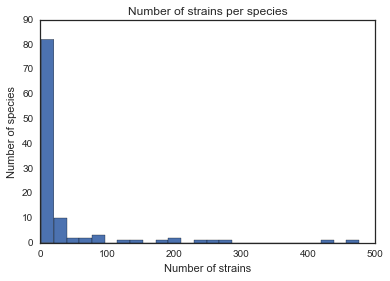

In [8]:
plt.hist(meta.groupby('Species').size(), bins=25)
plt.title('Number of strains per species')
plt.xlabel('Number of strains')
plt.ylabel('Number of species')

In [9]:
meta.groupby('Species').size().sort_values(ascending=False).head(20)

Species
Escherichia_coli                     476
Bifidobacterium_longum               426
Alistipes_onderdonkii                267
Bifidobacterium_adolescentis         248
Turicibacter_sanguinis               236
Bacteroides_thetaiotaomicron         198
Bifidobacterium_pseudocatenulatum    197
Bacteroides_ovatus                   186
Bacteroides_vulgatus                 141
Bacteroides_fragilis                 115
Bacteroides_uniformis                 92
Enterococcus_hirae                    86
Enterococcus_durans                   77
Bacteroides_xylanisolvens             75
Akkermansia_sp.                       67
Parabacteroides_distasonis            46
Akkermansia_muciniphila               45
Bacteroides_salyersiae                38
Lactobacillus_plantarum               37
Streptococcus_salivarius              36
dtype: int64

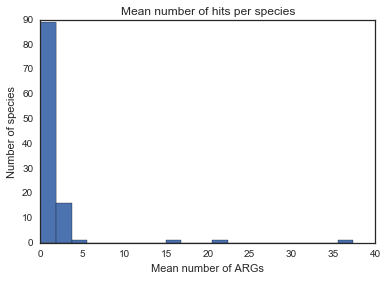

In [10]:
plt.hist(species['mean'], bins=20)
plt.title('Mean number of hits per species')
plt.xlabel('Mean number of ARGs')
plt.ylabel('Number of species')

In [11]:
species['mean'].sort_values(ascending=False).head(10)

Species
Escherichia_coli            37.373416
Citrobacter_amalonaticus    21.086957
Enterobacter_cloacae        16.000000
Proteus_mirabilis            5.285714
Enterococcus_faecalis        3.000000
Eubacterium_sp.              3.000000
Bacillus_cereus              3.000000
Clostridium_beijerinckii     3.000000
Bacteroides_vulgatus         2.775578
Enterococcus_faecium         2.473684
Name: mean, dtype: float64

1898


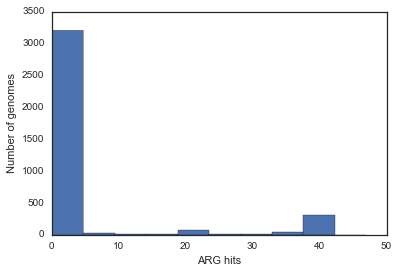

In [12]:
# Hits per genome
plt.hist(resdf[['genome', 'n_hits']].drop_duplicates()['n_hits'])
plt.xlabel('ARG hits')
plt.ylabel('Number of genomes')
print(sum(resdf[['genome', 'n_hits']].drop_duplicates()['n_hits'] > 0))

(array([52., 12., 12.,  4.,  3.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.27129054, 0.54258107, 0.81387161, 1.08516215,
        1.35645269, 1.62774322, 1.89903376, 2.1703243 , 2.44161483,
        2.71290537, 2.98419591, 3.25548645, 3.52677698, 3.79806752,
        4.06935806, 4.34064859, 4.61193913, 4.88322967, 5.15452021,
        5.42581074, 5.69710128, 5.96839182, 6.23968235, 6.51097289,
        6.78226343]),
 <a list of 25 Patch objects>)

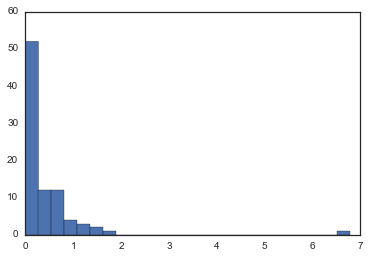

In [13]:
plt.hist(species['std'].dropna(), bins=25)

In [14]:
species.dropna(subset=['std']).sort_values(by='std').head(10)

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Akkermansia_muciniphila,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Clostridium_innocuum,13.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Collinsella_sp.,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coprococcus_eutactus,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Eggerthella_sp.,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Enterobacter_cloacae,80.0,16.0,0.0,16.0,16.0,16.0,16.0,16.0
Enterococcus_avium,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Enterococcus_faecalis,21.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Enterococcus_hirae,86.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [17]:
df.query('Species == "Akkermansia_muciniphila"')['genome'].unique().shape

(45,)

In [24]:
df.query('Species == "Escherichia_coli"')['genome'].unique().shape
species.sort_values(by='count', ascending=False).head()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Escherichia_coli,16732.0,37.373416,6.782263,5.0,38.0,40.0,41.0,47.0
Bifidobacterium_longum,426.0,0.007042,0.083720,0.0,0.0,0.0,0.0,1.0
Bacteroides_thetaiotaomicron,385.0,1.976623,0.429358,0.0,2.0,2.0,2.0,4.0
Bacteroides_vulgatus,303.0,2.775578,1.525435,0.0,2.0,2.0,4.0,6.0
Alistipes_onderdonkii,274.0,1.200730,1.182844,0.0,1.0,1.0,1.0,8.0


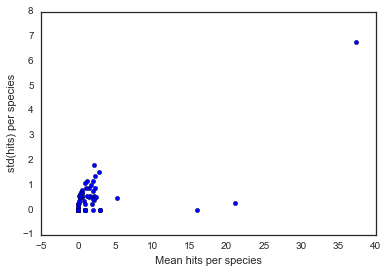

In [25]:
plt.scatter(species['mean'], species['std'])
plt.xlabel('Mean hits per species')
plt.ylabel('std(hits) per species')

In [179]:
species.loc['Enterobacter_cloacae']

count    80.0
mean     16.0
std       0.0
min      16.0
25%      16.0
50%      16.0
75%      16.0
max      16.0
Name: Enterobacter_cloacae, dtype: float64

In [188]:
df.dropna(subset=['orf_id']).query('Species == "Enterobacter_cloacae"').groupby('genome').size()

genome
am_0025_0085_b2    16
am_0025_0085_d2    16
am_0025_0085_e2    16
am_0025_0085_e3    16
am_0025_0085_f3    16
dtype: int64

So the Enterobacter cloacae has zero std because it's five strains from the same person on the same day - very likely to just be the same strain picked five separate times.

Need to figure out a way to account for this... maybe groupby donor?

In [189]:
species.loc['Citrobacter_amalonaticus']

count    253.000000
mean      21.086957
std        0.282330
min       21.000000
25%       21.000000
50%       21.000000
75%       21.000000
max       22.000000
Name: Citrobacter_amalonaticus, dtype: float64

In [190]:
df.dropna(subset=['orf_id']).query('Species == "Citrobacter_amalonaticus"').groupby('genome').size()

genome
aa_0143_0055_f3-BIS    22
ao_0067_0059_b1        21
ao_0067_0059_d1        21
ao_0067_0062_a5        21
ao_0067_0062_a7        21
ao_0067_0062_a8        21
ao_0067_0062_b6        21
ao_0067_0062_f5        21
ao_0067_0062_f6        21
ao_0067_0062_f7        21
ao_0067_0062_g7        21
ao_0067_0062_h5        21
dtype: int64

In [215]:
#resdf.groupby(['Species', 'Individual'])['n_hits'].describe()

# Make datasets for top 10 genes

Look at presence of genes across clades

In [234]:
def write_aro_name_dataset(resdf, g, fname, color='#000000'):
    """
    Writes a presence/absence dataset (0 or 1) for presence of
    given gene g (in column "aro_name") for each genome."""
    
    with open(fname, 'w') as f:
        f.write('DATASET_GRADIENT\n')
        f.write('SEPARATOR TAB\n')
        f.write('DATASET_LABEL\t' + g + '\n')
        f.write('COLOR\t#ff0000\n')

        # Min = white, max = black
        f.write('COLOR_MIN\t#ffffff\n')
        f.write('COLOR_MAX\t' + color + '\n')

        f.write('DATA\n')
        
        # Write the "yes has gene" lines
        has_g = resdf.query('aro_name == @g')
        f.write('\n'.join([i + '\t' + '1' for i in has_g['genome']]))
        
        # Write the "doesn't have gene" lines
        have = has_g['genome'].unique().tolist()
        doesnt_have = resdf.query('genome != @have')
        f.write('\n'.join([i + '\t' + '0' for i in doesnt_have['genome']]))
        

# Top 3 genes per phylum
n_genes = 3
genes = []

for p in ['Proteobacteria', 'Bacteroidetes', 'Firmicutes']:
    genes += resdf.query('phylum == @p').groupby('aro_name').size().sort_values(ascending=False).head(n_genes).index.tolist()

colors = [rgb2hex(i) for i in sns.color_palette('Set1', len(genes))]

for i in range(len(genes)):
    fname = '../../data/analysis/itol_dataset.' + genes[i] + '.txt'        
    write_aro_name_dataset(resdf, genes[i], fname, colors[i])

# Basic stats about the data for Rafalab group meeting

In [195]:
meta['Individual'].unique().shape

(11,)

In [196]:
meta['genome'].unique().shape

(3717,)

In [197]:
meta['Species'].unique().shape

(109,)

In [36]:
meta.query('phylum == "Proteobacteria"')['Species'].unique()

array(['Citrobacter_amalonaticus', 'Enterobacter_cloacae',
       'Escherichia_coli', 'Parasutterella_excrementihominis',
       'Proteus_mirabilis'], dtype=object)

## Within donor variation vs. between donor variation


> You can do within-(bacterial) species variation with a few donors, as long as you have multiple strains within your few donors

> Also you could have a look at between people variation - we should have enough species per donor to do that.


In [51]:
# Number of donors that each strain is found in
(resdf
    .groupby(['Species', 'Individual'])
 .size()
 .reset_index()
 .groupby('Species')
 .size()
 .sort_values(ascending=False)
 .head(21)
)

Species
Bacteroides_ovatus                   10
Escherichia_coli                     10
Bacteroides_uniformis                 9
Parabacteroides_distasonis            9
Bacteroides_vulgatus                  8
Bifidobacterium_longum                8
Bacteroides_xylanisolvens             8
Bifidobacterium_adolescentis          7
Bacteroides_fragilis                  7
Bacteroides_caccae                    6
Bifidobacterium_pseudocatenulatum     6
Bacteroides_thetaiotaomicron          6
Streptococcus_salivarius              5
Lactobacillus_plantarum               4
Parabacteroides_merdae                4
Enterococcus_durans                   4
Propionibacterium_acnes               4
Enterococcus_faecium                  4
Bacillus_amyloliquefaciens            4
Bacteroides_cellulosilyticus          4
Bacteroides_faecis                    3
dtype: int64

In [65]:
# Get species which are present in at least four donors,
# Then see how many strains per donor they have.
# Goal: compare within-person variation with between-person variation
sp = (resdf.groupby(['Species', 'Individual'])
           .size()
           .reset_index()
           .groupby('Species')
           .size())
sp = sp[sp > 3].sort_values(ascending=False)
sp = sp.index.tolist()

max_s = []
for s, subdf in resdf.query('Species == @sp').groupby(['Species']):
    max_s.append([s, subdf.groupby('Individual').size().max()])
max_s = pd.DataFrame(max_s, columns=['Species', 'max_genomes_per_indiv'])

In [68]:
max_s.sort_values(by='max_genomes_per_indiv', ascending=False)

,Species,max_genomes_per_indiv
14,Escherichia_coli,10246
5,Bacteroides_thetaiotaomicron,307
7,Bacteroides_vulgatus,165
3,Bacteroides_fragilis,136
11,Bifidobacterium_pseudocatenulatum,118
6,Bacteroides_uniformis,96
8,Bacteroides_xylanisolvens,95
4,Bacteroides_ovatus,94
10,Bifidobacterium_longum,93
12,Enterococcus_durans,71


In [73]:
s = "Bacteroides_thetaiotaomicron"

resdf.query('Species == @s').groupby(['Individual'])['n_ hits'].describe()

,count,mean,std,min,25%,50%,75%,max
Individual,,,,,,,,
aa,4.0,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
af,307.0,2.000000,0.161690,0.0,2.0,2.0,2.0,3.0
av,5.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
bk,11.0,3.181818,0.873863,1.0,3.0,3.0,4.0,4.0
bq,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0
cx,53.0,1.943396,0.233295,1.0,2.0,2.0,2.0,2.0


# Check cutoffs

Need to make sure it's not just % identity, but also has a coverage cutoff.

In [27]:
df.columns

Index([u'orf_id', u'contig', u'start', u'stop', u'orientation', u'cut_off',
       u'pass_evalue', u'best_hit_evalue', u'best_hit_aro', u'best_identities',
       u'aro', u'aro_name', u'model_type', u'snp', u'best_hit_aro_category',
       u'aro_category', u'pass_bitscore', u'best_hit_bitscore', u'bit_score',
       u'predicted_dna', u'predicted_protein', u'card_protein_sequence',
       u'label', u'id', u'model_id', u'genome', u'Species', u'phylum',
       u'Individual', u'Time_point', u'Plate_number', u'Well_number'],
      dtype='object')

In [33]:
df['best_hit_evalue'].max()

1.95185e-42

In [39]:
df['best_identities'].min()
df.query('best_identities == 44.96')

,orf_id,contig,start,stop,orientation,cut_off,pass_evalue,best_hit_evalue,best_hit_aro,best_identities,...,label,id,model_id,genome,Species,phylum,Individual,Time_point,Plate_number,Well_number
2966,scaffold12|size144354_100,ID=12_100;partial=00;start_type=ATG;rbs_motif=...,105022.0,106665.0,+,Strict,NaN,3.728520e-162,MCR-3,44.96,...,scaffold12|size144354_100#105023#106666#1#ID=1...,gnl|BL_ORD_ID|2009|hsp_num:0,2795.0,am_0025_0085_d2,Enterobacter_cloacae,Proteobacteria,am,25.0,85.0,d2
2979,scaffold10|size139890_100,ID=10_100;partial=00;start_type=ATG;rbs_motif=...,105022.0,106665.0,+,Strict,NaN,3.728520e-162,MCR-3,44.96,...,scaffold10|size139890_100#105023#106666#1#ID=1...,gnl|BL_ORD_ID|2009|hsp_num:0,2795.0,am_0025_0085_e3,Enterobacter_cloacae,Proteobacteria,am,25.0,85.0,e3
14830,scaffold10|size144354_100,ID=10_100;partial=00;start_type=ATG;rbs_motif=...,105022.0,106665.0,+,Strict,NaN,3.728520e-162,MCR-3,44.96,...,scaffold10|size144354_100#105023#106666#1#ID=1...,gnl|BL_ORD_ID|2009|hsp_num:0,2795.0,am_0025_0085_b2,Enterobacter_cloacae,Proteobacteria,am,25.0,85.0,b2
14948,scaffold11|size139890_100,ID=11_100;partial=00;start_type=ATG;rbs_motif=...,105022.0,106665.0,+,Strict,NaN,3.728520e-162,MCR-3,44.96,...,scaffold11|size139890_100#105023#106666#1#ID=1...,gnl|BL_ORD_ID|2009|hsp_num:0,2795.0,am_0025_0085_f3,Enterobacter_cloacae,Proteobacteria,am,25.0,85.0,f3
15020,scaffold11|size145038_101,ID=11_101;partial=00;start_type=ATG;rbs_motif=...,105542.0,107185.0,+,Strict,NaN,3.728520e-162,MCR-3,44.96,...,scaffold11|size145038_101#105543#107186#1#ID=1...,gnl|BL_ORD_ID|2009|hsp_num:0,2795.0,am_0025_0085_e2,Enterobacter_cloacae,Proteobacteria,am,25.0,85.0,e2


In [41]:
df['snp'].dropna()

48       E448K
201      E448K
292      E448K
295       S83L
522      E448K
626      E448K
749      E448K
759      E350Q
819      E448K
875      E448K
896      E350Q
930      E448K
955      E350Q
978      E448K
1020     E448K
1039     E350Q
1084     E448K
1100     E448K
1158     E448K
1174     E350Q
1206     E448K
1248     E448K
1275     E448K
1276     E350Q
1346     E448K
1382     E448K
1435     E350Q
1438     E448K
1470     E448K
1509     E350Q
         ...  
17126    E448K
17290    E448K
17417    E448K
17438    E350Q
17445    E448K
17461    E448K
17509    E448K
17542    E448K
17597    E448K
17636    E448K
17651    E448K
17688    E448K
17712    E350Q
17864    E448K
17891    E350Q
17928    E350Q
17929    E448K
18004    E448K
18026    E350Q
18145    E448K
18164    E350Q
18269    E448K
18288    E350Q
18364    E350Q
18452    E448K
18540    E350Q
18973    E350Q
19007    E350Q
19025    E448K
19175    E350Q
Name: snp, Length: 617, dtype: object